# COGS 108 - EDA Checkpoint

# So far, Harry Lei and Hongchang Jiang have contributed to this file

# Names

- Chenyu Zhang A16526395
- Zhengxi Zhang A17220038
- Mengyuan Zhang A15598814
- Harry Lei A15890785
- Hongchang Jiang A17180573

<a id='research_question'></a>
# Research Question

Is there a relationship between the severity of COVID-19 pandemic in the United States and the stock price of internationlly major automotive companies? If there is, does severity of COVID-19 have a strong positive correlation with stock price per share of automotive companies? Severity of COVID-19 will take into account of daily increase of death, hospitalization, positve cases and total test cases. 


# Setup

In [1]:
# Importing necessage pacakges
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Cleaning

### General Steps:
1. Concatenate dataframes of each individual automotive company into one large dataframe called **car**
2. Add extra variable called 'Maker' to **car** dataframe to facilate further EDA analysis
3. Drop any duplicate observations that have the same date in both **car** and **covid** dataframe
4. Drop any columns that only has NaN values in both **car** and **covid** dataframe
5. Filter **covid** dataframe to only include observations that has non-zero Covid cases
6. Reduce **covid** dataframe to five variables: date, deathIncrease, hospitalizedIncrease, positiveIncrease and totalTestResultsIncrease
7. Filter **car** dataframe to match the time scope of **covid** dataframe
8. Rename columns of **car** dataframe to make naming conventions consistent
9. Sort **car** dataframe in decending orders to make date consistent with **covid** dataframe

In [2]:
# Read Data from Car folder
data_dir = 'Car'
folder_name = ['Audi','BMW','General Motors','Honda','NIO','Nissan','Rolls Royces','Tata','Toyota','Volkswagen']

file_name = []
for name in folder_name:
    if (name == 'NIO') or (name == 'Volkswagen'):
        tmp = name
    elif name == 'General Motors':
        tmp = 'gm'
    else:
        tmp = name.lower()
    file_name.append(tmp)

df_name = []

for i,fname in enumerate(file_name):
    file_path = os.path.join(data_dir,folder_name[i])
    file_path = os.path.join(file_path,fname) + '.csv'
    if " " in fname:
        fname = fname.replace(" ","")
    globals()[fname] = pd.read_csv(file_path)
    globals()[fname]['Maker'] = fname
    df_name.append(fname)

df_list = [audi, bmw, gm, honda, NIO, nissan, rollsroyces, tata, toyota, Volkswagen]
car = pd.DataFrame()

for df in df_list:
    df = df.drop_duplicates(subset=['Date'])
    car = pd.concat([car, df], axis='rows')


car = car.dropna(how='all')
car = car[ car['Date'] > '2020-01-16' ]
car = car[ car['Date'] < '2021-03-09' ]
car = car.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adjClose','Volumn':'volumn','Maker':'maker'})
car = car.sort_values(by='date', ascending=False)

#Read covid data from online sources
covid = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
covid

#clean covid dataframe
covid = covid.drop_duplicates(subset=['date'])
covid = covid.dropna(how='all')
covid = covid[covid['positiveIncrease'] != 0.0]
covid = covid[['date', 'deathIncrease', 'hospitalizedIncrease', 'positiveIncrease', 'totalTestResultsIncrease']]

covid = covid.sort_values(by='date', ascending=True)
car = car.sort_values(by='date', ascending=True)
car = car.reset_index()
car = car.drop(['index'],axis = 1)

# Audi AG has been discountinued, remove from dataframe
car = car[ car['maker'] != 'audi' ]
car = car[ car['maker'] != 'NIO' ]

# Add the difference between open and close
car = car.assign(diff = car['adjClose']-car['open'])
car.head()

,date,open,high,low,close,adjClose,Volume,maker,diff
1,2020-01-17,234.315201,234.946594,231.638504,231.912994,216.563721,32818945.0,rollsroyces,-17.751480
2,2020-01-17,197.250000,199.449997,195.699997,197.300003,197.300003,18204088.0,tata,0.050003
3,2020-01-17,71.690002,71.949997,70.910004,71.059998,64.246513,2112839.0,bmw,-7.443489
4,2020-01-17,35.570000,35.730000,35.410000,35.599998,35.170948,9871700.0,gm,-0.399052
5,2020-01-17,181.240005,183.399994,180.679993,181.360001,170.873093,988847.0,Volkswagen,-10.366912


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

### Checking the size of dataframes

In [21]:
#Check Dataset Car's observations and column variables
car.shape

(2287, 9)

In [22]:
#Check Dataset covid's observations and column variables
covid.shape

(385, 5)

### Merging and Checking for Missingness

In [23]:
#Merge two datasets car, covid into one new dataset called merge by their similar column variable: date 
merge = pd.merge(car, covid, how='outer', on = 'date')
merge.head()

,date,open,high,low,close,adjClose,Volume,maker,diff,deathIncrease,hospitalizedIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-01-17,234.315201,234.946594,231.638504,231.912994,216.563721,32818945.0,rollsroyces,-17.751480,NaN,NaN,NaN,NaN
1,2020-01-17,197.250000,199.449997,195.699997,197.300003,197.300003,18204088.0,tata,0.050003,NaN,NaN,NaN,NaN
2,2020-01-17,71.690002,71.949997,70.910004,71.059998,64.246513,2112839.0,bmw,-7.443489,NaN,NaN,NaN,NaN
3,2020-01-17,35.570000,35.730000,35.410000,35.599998,35.170948,9871700.0,gm,-0.399052,NaN,NaN,NaN,NaN
4,2020-01-17,181.240005,183.399994,180.679993,181.360001,170.873093,988847.0,Volkswagen,-10.366912,NaN,NaN,NaN,NaN


In [24]:
#Check the bottom data of Dataset merge's observations and column variables
merge.tail()

,date,open,high,low,close,adjClose,Volume,maker,diff,deathIncrease,hospitalizedIncrease,positiveIncrease,totalTestResultsIncrease
2391,2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,997.0,58702.0,1232995.0
2392,2021-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1847.0,1428.0,71245.0,1655179.0
2393,2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1051.0,879.0,54349.0,1408422.0
2394,2021-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1680.0,503.0,60015.0,1430992.0
2395,2021-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842.0,726.0,41835.0,1170059.0


Since there are no trading hours for stocks on Saturdays and Sundays, the car dataframe does not contain weekend observations. Also, since our covid dataframe starts from 2020-01-19, it does not contain any observations before this date. 

### descriptive statistics of Dataframes

In [25]:
#Check Dataset covid's mean, count, std,etc.
covid = covid[['date','positiveIncrease', 'hospitalizedIncrease', 'deathIncrease', 'totalTestResultsIncrease']]
covid.describe()

,positiveIncrease,hospitalizedIncrease,deathIncrease,totalTestResultsIncrease
count,385.000000,385.000000,385.000000,3.850000e+02
mean,74692.179221,2016.522078,1338.054545,9.450002e+05
std,68418.449037,1686.751661,1048.793548,6.306638e+05
min,1.000000,-2858.000000,0.000000,0.000000e+00
25%,26796.000000,1031.000000,621.000000,4.159230e+05
50%,48986.000000,1578.000000,1078.000000,8.904260e+05
75%,105996.000000,2674.000000,1788.000000,1.453174e+06
max,295121.000000,17155.000000,5427.000000,2.309884e+06


In [26]:
#Check Dataset car's mean, count, std,etc.
car.describe()

,open,high,low,close,adjClose,Volume,diff
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2.286000e+03,2286.000000
mean,138.938366,141.442195,136.404468,138.825499,137.223078,2.190967e+07,-1.715287
std,134.129945,136.346661,132.026381,134.133135,134.262999,3.530888e+07,5.815807
min,16.340000,18.559999,14.330000,16.799999,16.799999,5.990000e+04,-32.500000
25%,50.012500,51.042500,48.666250,49.990001,46.019528,9.336380e+05,-3.807558
50%,109.041649,112.780002,105.112350,108.770100,107.588417,4.675830e+06,-0.620002
75%,149.207504,150.914997,146.894997,148.595005,146.239983,2.914849e+07,0.239998
max,650.000000,664.500000,636.400024,653.000000,653.000000,3.905778e+08,44.000000


### Visualization

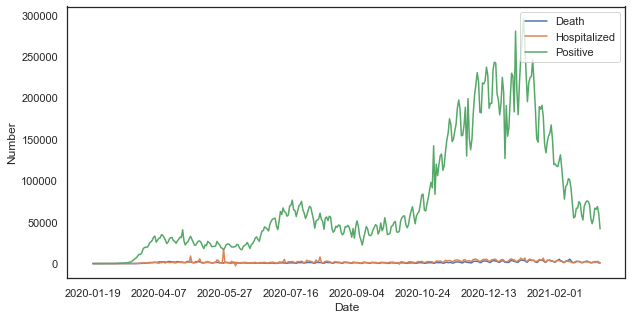

In [32]:
#Create plot to show the change of number in Death, Hospitalized, Positive Increase in date
f1 = plt.gcf()
f1.set_size_inches(10,5)
x = covid['date']

plt.plot(x, covid['deathIncrease'], label='Death')
plt.plot(x, covid['hospitalizedIncrease'], label='Hospitalized')
plt.plot(x, covid['positiveIncrease'], label='Positive')
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(0,365,50))
plt.show()

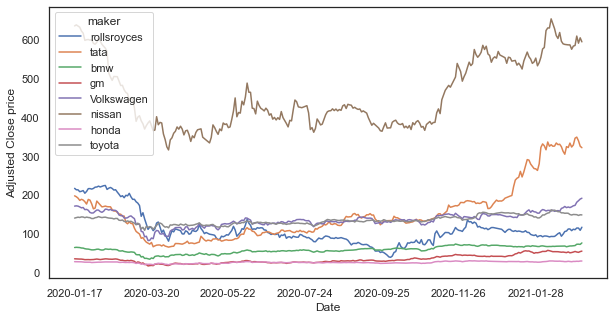

In [33]:
#Create plot to show the change of number in stock price of every car brandin date
fig, ax = plt.subplots()
ax = sns.lineplot(x = 'date', y ='adjClose', hue = 'maker', data = car)
ax.set(xlabel = 'Date', ylabel= 'Adjusted Close price')
ax.set_xticks(range(0, 300, 45))
fig.set_size_inches(10, 5)

In [29]:
#sns.regplot(data = merge, x = 'deathIncrease', y = 'deathIncrease',line_kws={"color": "red"})
covid_corr = covid.corr()
covid_corr.style.background_gradient(cmap='coolwarm')

,positiveIncrease,hospitalizedIncrease,deathIncrease,totalTestResultsIncrease
positiveIncrease,1.000000,0.665770,0.682914,0.877645
hospitalizedIncrease,0.665770,1.000000,0.608930,0.583107
deathIncrease,0.682914,0.608930,1.000000,0.619125
totalTestResultsIncrease,0.877645,0.583107,0.619125,1.000000


Daily positive increase is positively correlated with daily hospitalized and daily death, so we can use only the daily positive increase to explore the correlation between stock price

### EDA Conclusion

Through visualization, we can find a total of four sharp inflection points in the plot obtained from the Covid database. In the following analysis, we will use the four inflection points and the stationary period after the inflection point to analyze by date. At the end, we analyze the correlation as the data support and conclusion support for our analysis.

#### The first outbreak of the epidemic(Jan,2020 to June,2020)

During this period, the epidemic began to spread across North America from zero, and the number of daily infections increased from January to March until it gradually reached 30,000 to 40,000 per day, and maintained this number until June. As can be seen from our plot of auto stock prices, auto stock prices fell rapidly from January until March began to rebound to a certain extent, but they could not return to the prices before the epidemic, and with the second outbreak of the epidemic in June, the Shares fell again. This is obviously in line with our conjecture that the severity of the epidemic will make people feel uneasy about auto stocks, which will affect the stock price and cause the stock price to drop. severity of COVID-19 have a strong positive correlation with stock price per share of automotive companies

#### The Second outbreak of the epidemic(June,2020 to Sep,2020)

During this period, the second outbreak of the epidemic occurred, from about 30,000 daily infections before June until the peak in July and then slowly declining until September, but always above 50,000.
As can be seen from our plot of auto stock prices, the rebound period of auto stock prices that started in March ended in June, and the stock prices began to decline rapidly until the peak of the epidemic in July, and with the reduction in the number of daily epidemic infections, the stock prices began to fall again. of rebound. This is also in line with our conjecture that as the severity of the outbreak subsides, there is renewed confidence in auto stock prices. We can still argue that the severity of COVID-19 has a strong positive correlation with stock price per share of automotive companies

#### The Third outbreak of the epidemic(Sep,2020 to Jan,2021)

During this period, the third outbreak of the epidemic occurred. From September to October, the number of daily infections began to rebound slowly, and then ushered in a sharp and exaggerated rise from September to January. The number of infections rose from about 50,000 in September to about 70,000 in October, and spiked to around 150,000-200,000 per day for the next four months.
As you can see from our plot of auto share prices, auto share prices differ from our previous understanding that severity of COVID-19 have a strong positive correlation with stock price per share of automotive companies. The doubling of the number of people infected by the epidemic has not caused the stock price to fall again, but has caused the stock price to soar rapidly. From October to November when the epidemic grew rapidly, in just over a month, most of the auto stock prices rose by at least 30%, and after that, it continued to grow as the number of people affected by the epidemic increased. It can be seen that during this period, the severity of the epidemic has always had an impact on auto stock prices, But this time severity of COVID-19 have a strong negative correlation with stock price per share of automotive companies

#### The Ending of Third outbreak of the epidemic(Jan,2021 to Feb,2021)

During this period, the impact of the third outbreak of the epidemic began to gradually end. The number of daily infections has dropped to 5w from 150,000 to 200,000 in previous months.
Unlike the previous few times, the sharp reduction in the number of infected people did not significantly affect the stock price, and the stock price of most auto stocks did not increase or decrease significantly, which made this short period of time an outlier in us. in the analysis. Due to the lack of observation samples and the follow-up situation, we believe that this period of time showing that the severity of the epidemic does not have much relationship with the stock price of automobiles has no significance to affect the conclusion, and can be treated as an outlier.

#### Conclusion
In the above analysis, we found that the severity of COVID-19 has a strong correlation with stock price per share of automotive companies through the analysis of the data and the chart, and before the third outbreak, that is, before September 2020 , this relationship is strongly positive. But we have a reasonable doubt that as people adapt to the epidemic, the impact of the increase in the number of infections, such as policy changes, the demand for cars has led people to be optimistic about auto stocks again, which has led to stock prices skyrocketing. After the third major outbreak, the increase in daily infections caused by the outbreak led to a major increase in auto stocks. Our initial conclusion is that there is a relationship between the severity of the COVID-19 pandemic in the United States and the stock price of internationlly major automotive companies, but as people adjust to the outbreak, it changes from a strong positive to a strong negative relationship.




### Further Analysis

After considering our initial EDA conclusions, we believe that our conclusions always lack real data analysis, so we will make data analysis in this section to ensure that there is a clear relationship between auto stock prices and the severity of the Covid. At the same time, we also want to analyze each company in our total database to ensure that after excluding outliers, most companies have obvious relationships in our database, rather than a few companies that have relationships and most companies have no relationship. Compared with the previous stage that we mainly used the increase in the number of infected people. In this stage, we will analyze the correlation between the increase in the number of infected people and auto stock prices and the correlation between the increase in the number of deaths and auto stock prices. This will help us better understand the severity of the outbreak and ensure that the topic of the severity of the outbreak is broad.

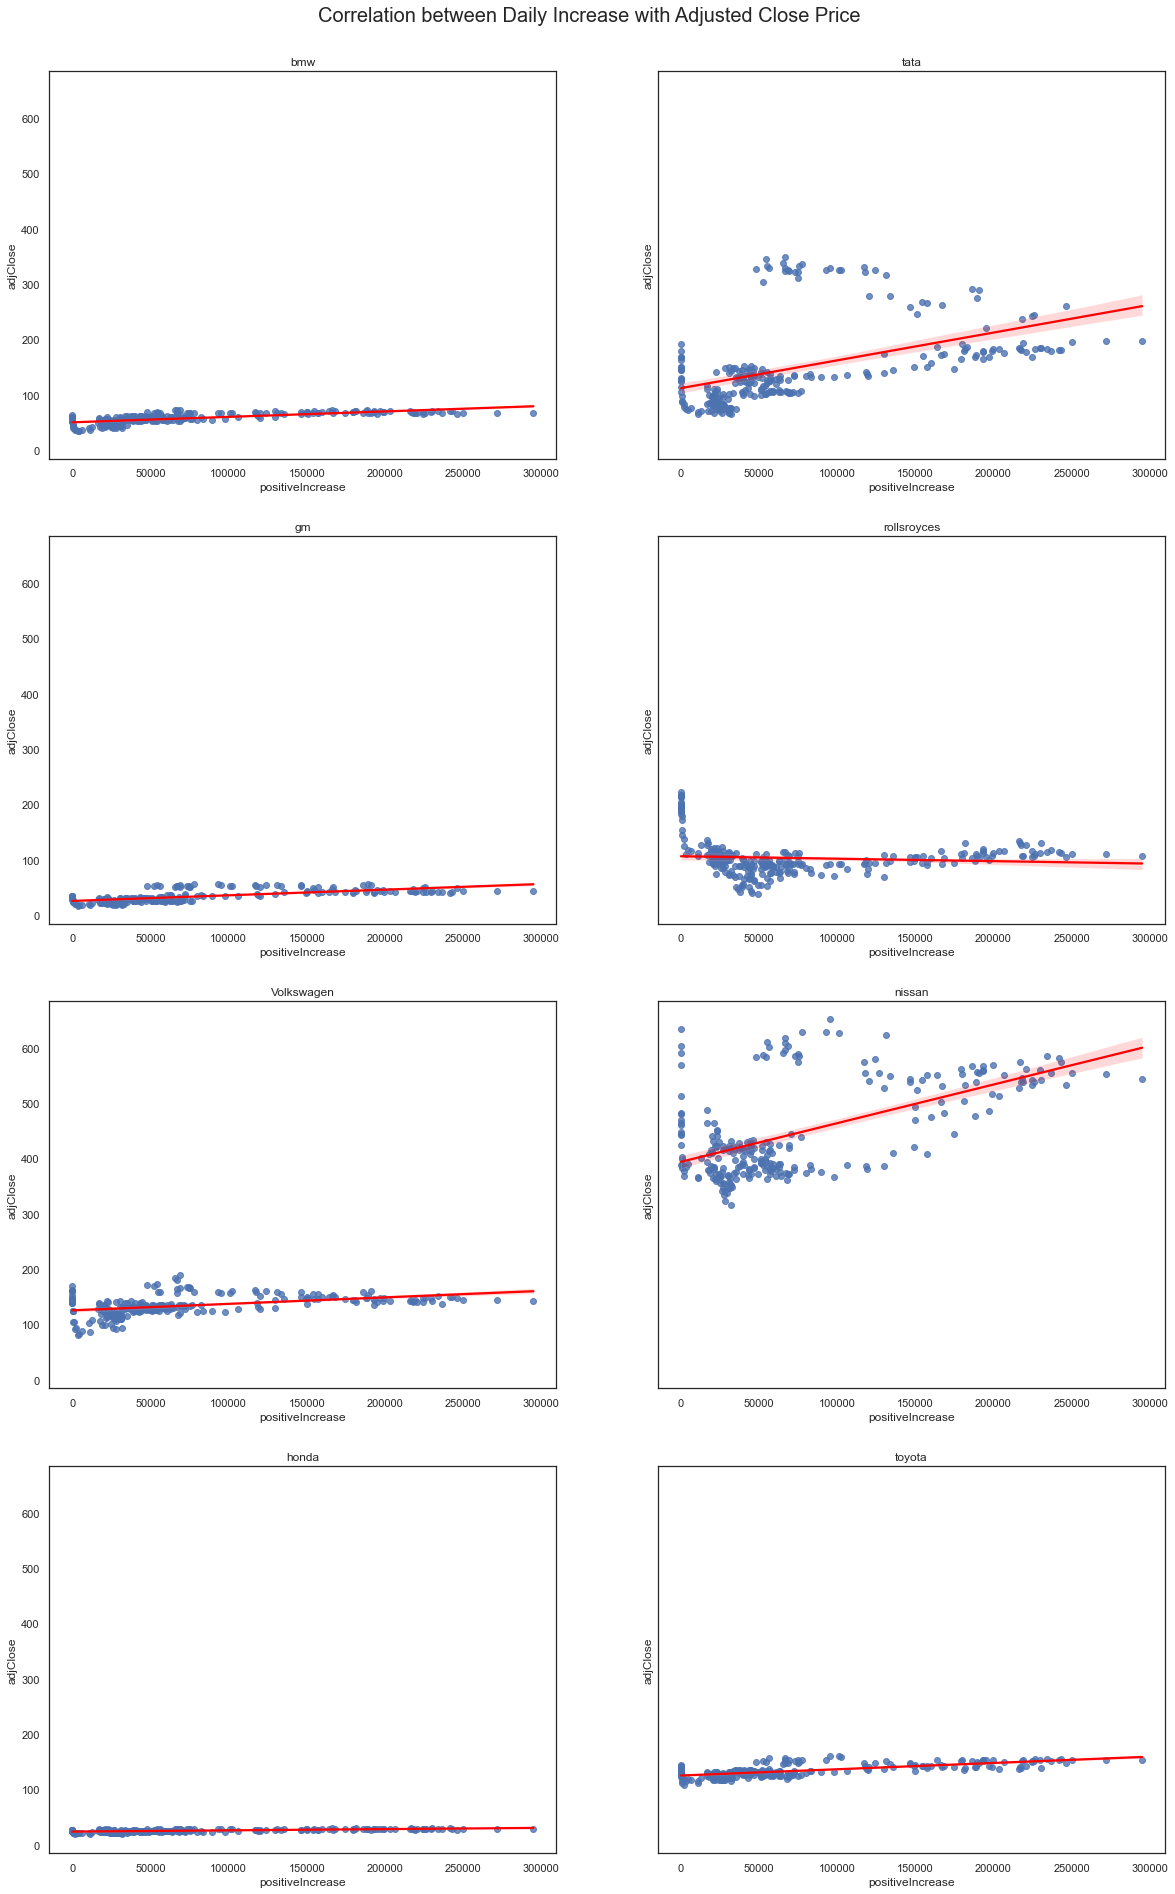

In [34]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]) = plt.subplots(ncols = 2, nrows = 4, sharey = True, figsize=(20,30))
sns.set(font_scale=1, style="white")

sns.regplot(data = merge[merge['maker']=='bmw'], ax=ax1, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='tata'], ax=ax2, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='gm'], ax=ax3, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='rollsroyces'], ax=ax4, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='Volkswagen'], ax=ax5, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='nissan'], ax=ax6, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='honda'], ax=ax7, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='toyota'], ax=ax8, x = 'positiveIncrease', y = 'adjClose',line_kws={"color": "red"})

plt.suptitle('Correlation between Daily Increase with Adjusted Close Price', fontsize=20)
fig.subplots_adjust(top=0.95)
ax1.title.set_text('bmw')
ax2.title.set_text('tata')
ax3.title.set_text('gm')
ax4.title.set_text('rollsroyces')
ax5.title.set_text('Volkswagen')
ax6.title.set_text('nissan')
ax7.title.set_text('honda')
ax8.title.set_text('toyota')

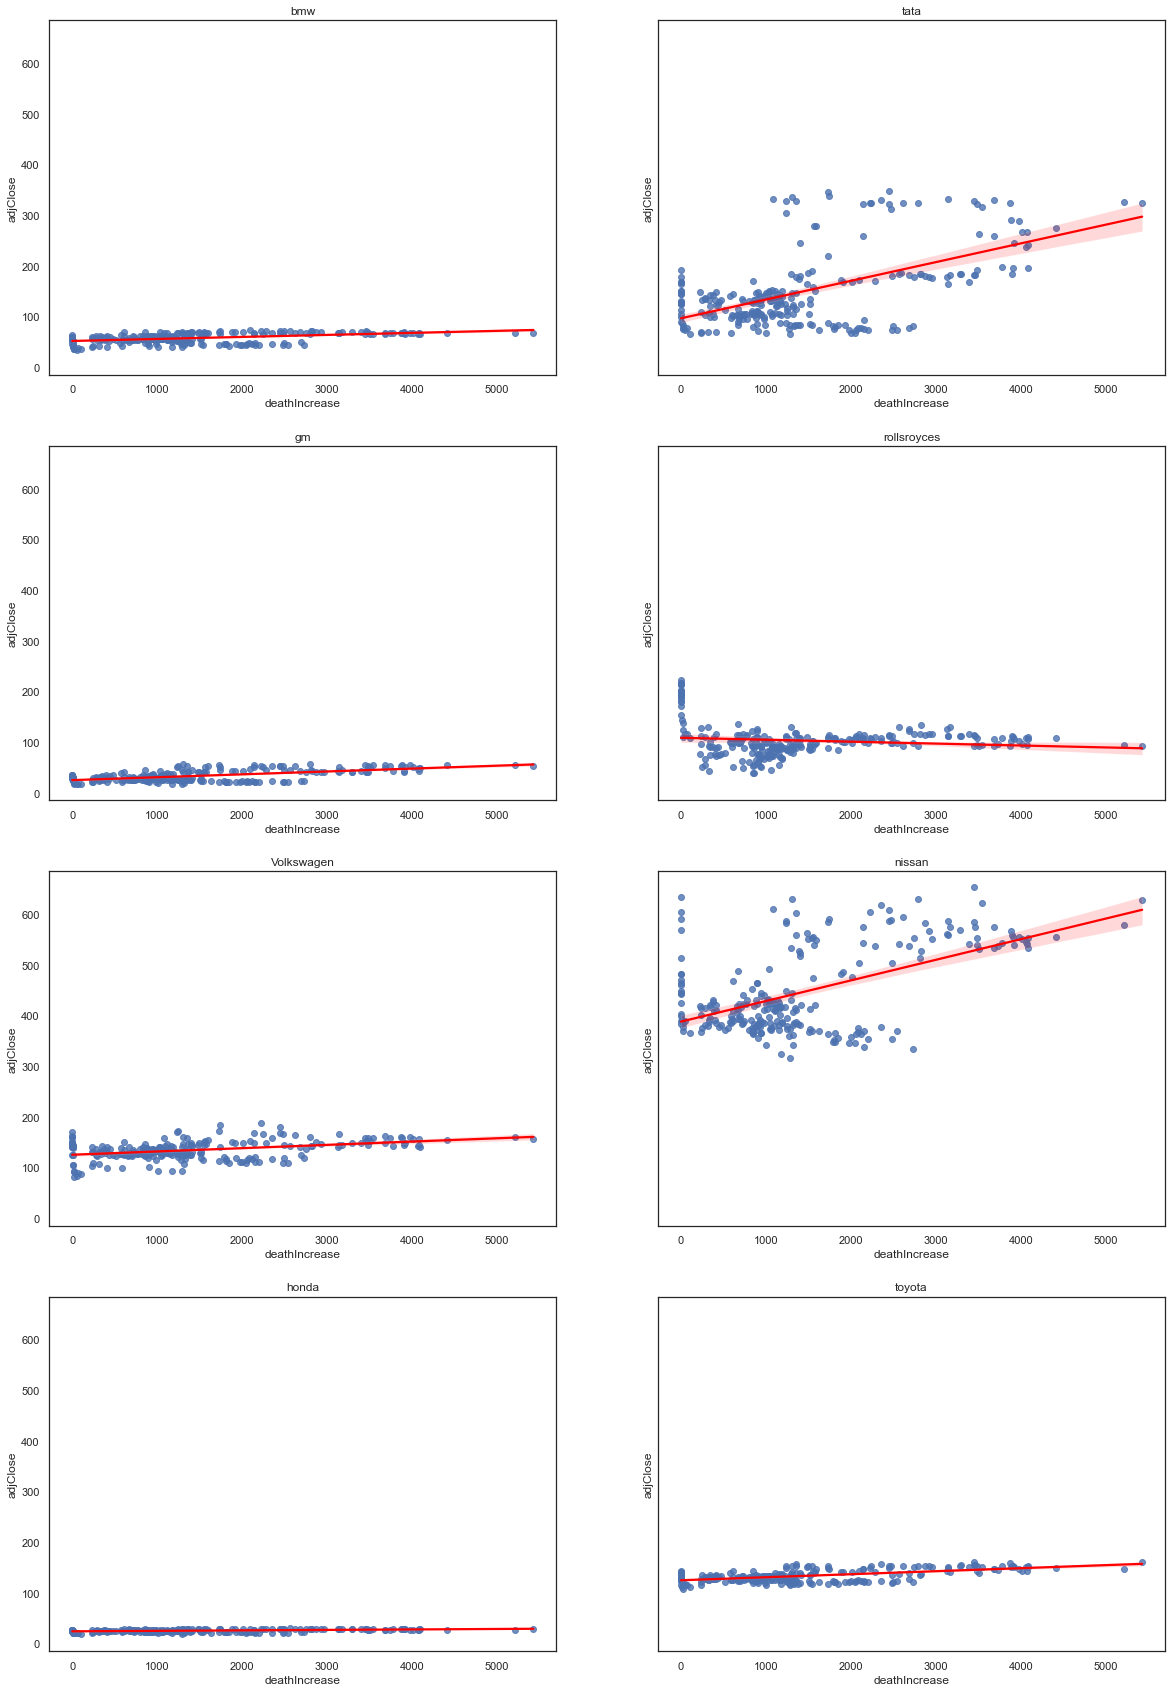

In [35]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]) = plt.subplots(ncols = 2, nrows = 4, sharey = True, figsize=(20,30))
sns.set(font_scale=1, style="white")

sns.regplot(data = merge[merge['maker']=='bmw'], ax=ax1, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='tata'], ax=ax2, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='gm'], ax=ax3, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='rollsroyces'], ax=ax4, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='Volkswagen'], ax=ax5, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='nissan'], ax=ax6, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='honda'], ax=ax7, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})
sns.regplot(data = merge[merge['maker']=='toyota'], ax=ax8, x = 'deathIncrease', y = 'adjClose',line_kws={"color": "red"})

ax1.title.set_text('bmw')
ax2.title.set_text('tata')
ax3.title.set_text('gm')
ax4.title.set_text('rollsroyces')
ax5.title.set_text('Volkswagen')
ax6.title.set_text('nissan')
ax7.title.set_text('honda')
ax8.title.set_text('toyota')